In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

In [17]:
tube = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/TUBE_merge_1.csv'),
                  index_col=0)

In [19]:
pipe = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/PIPE_merge_1.csv'),
                  index_col=0)

In [20]:
def plot_corr(data):
    '''
    Plot correlation 
    Args:
    - data: pd dataframe
    '''
    corr = data.corr()
    sns.set(font_scale=1.2)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(15, 15))
        ax = sns.heatmap(corr, mask=mask, square=True, cmap='RdBu_r', center=0)


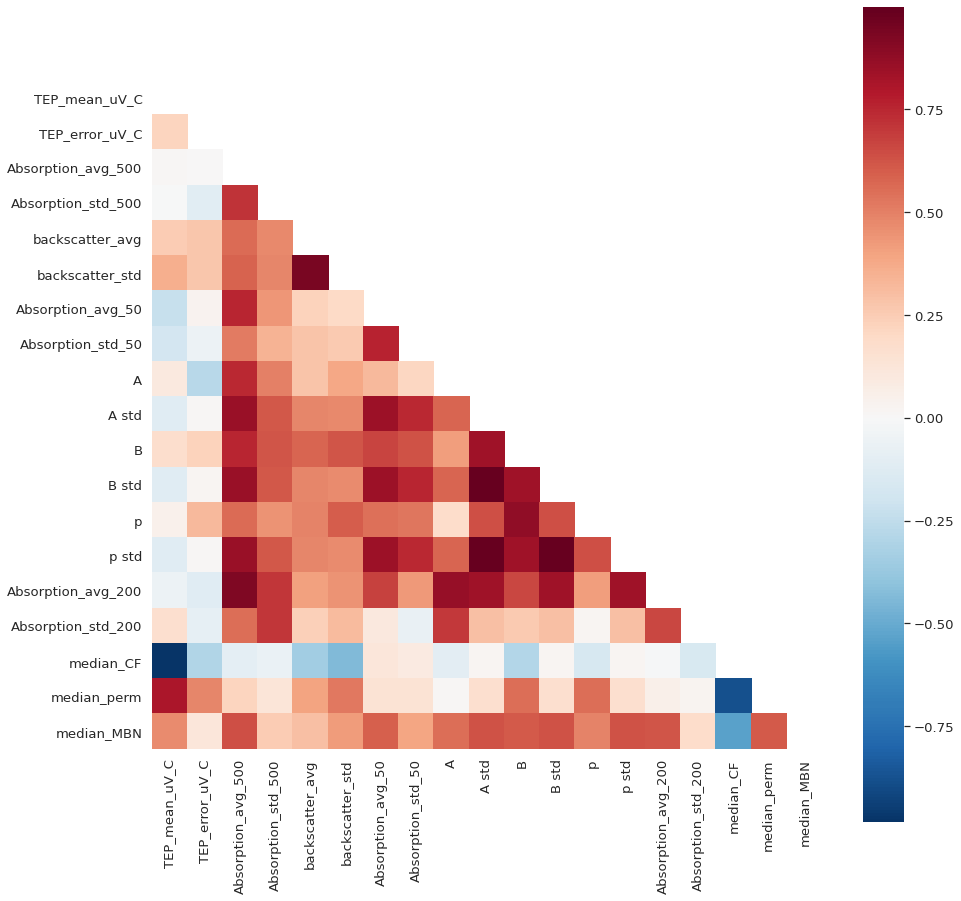

In [21]:
plot_corr(tube)

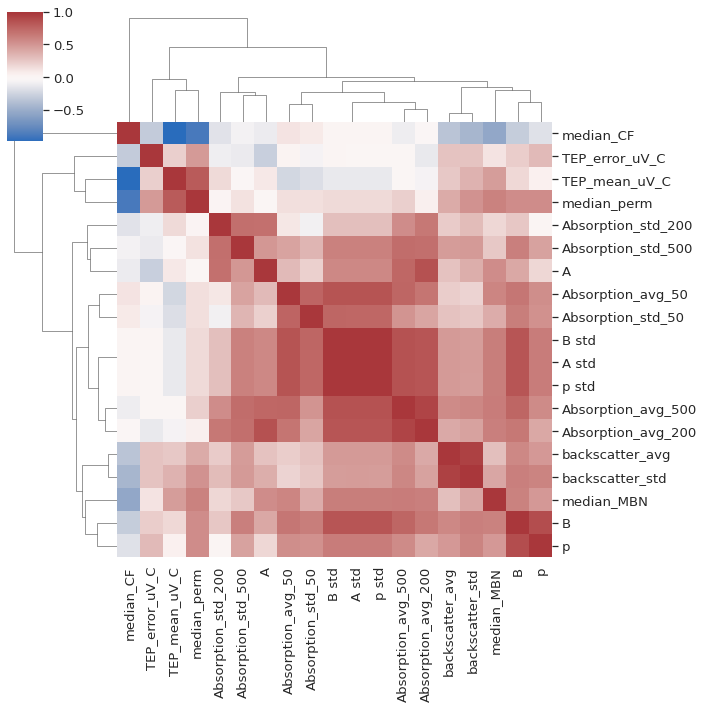

In [29]:
sns.clustermap(tube.corr(), center=0, cmap="vlag",)

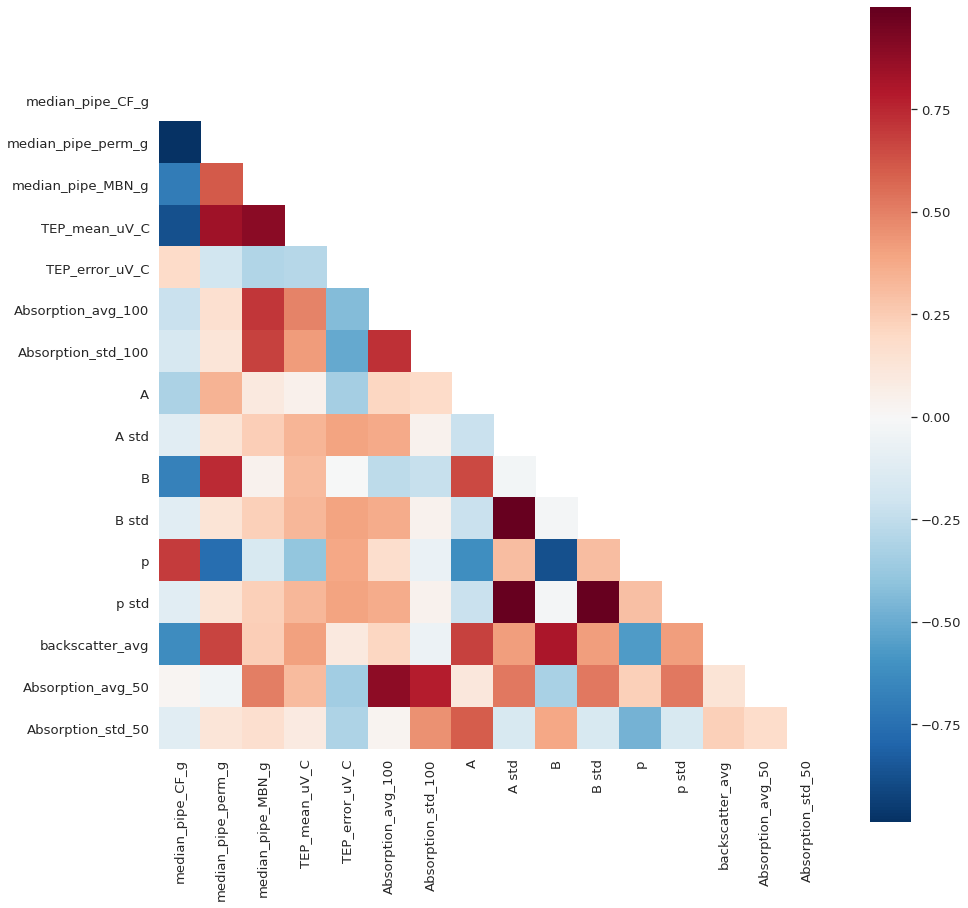

In [22]:
plot_corr(pipe)

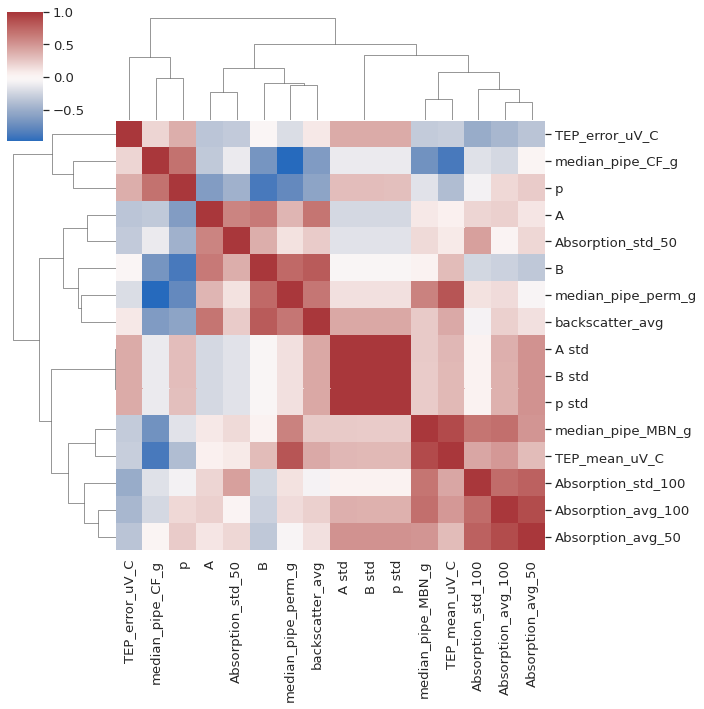

In [28]:
sns.clustermap(pipe.corr(), center=0, cmap="vlag",)

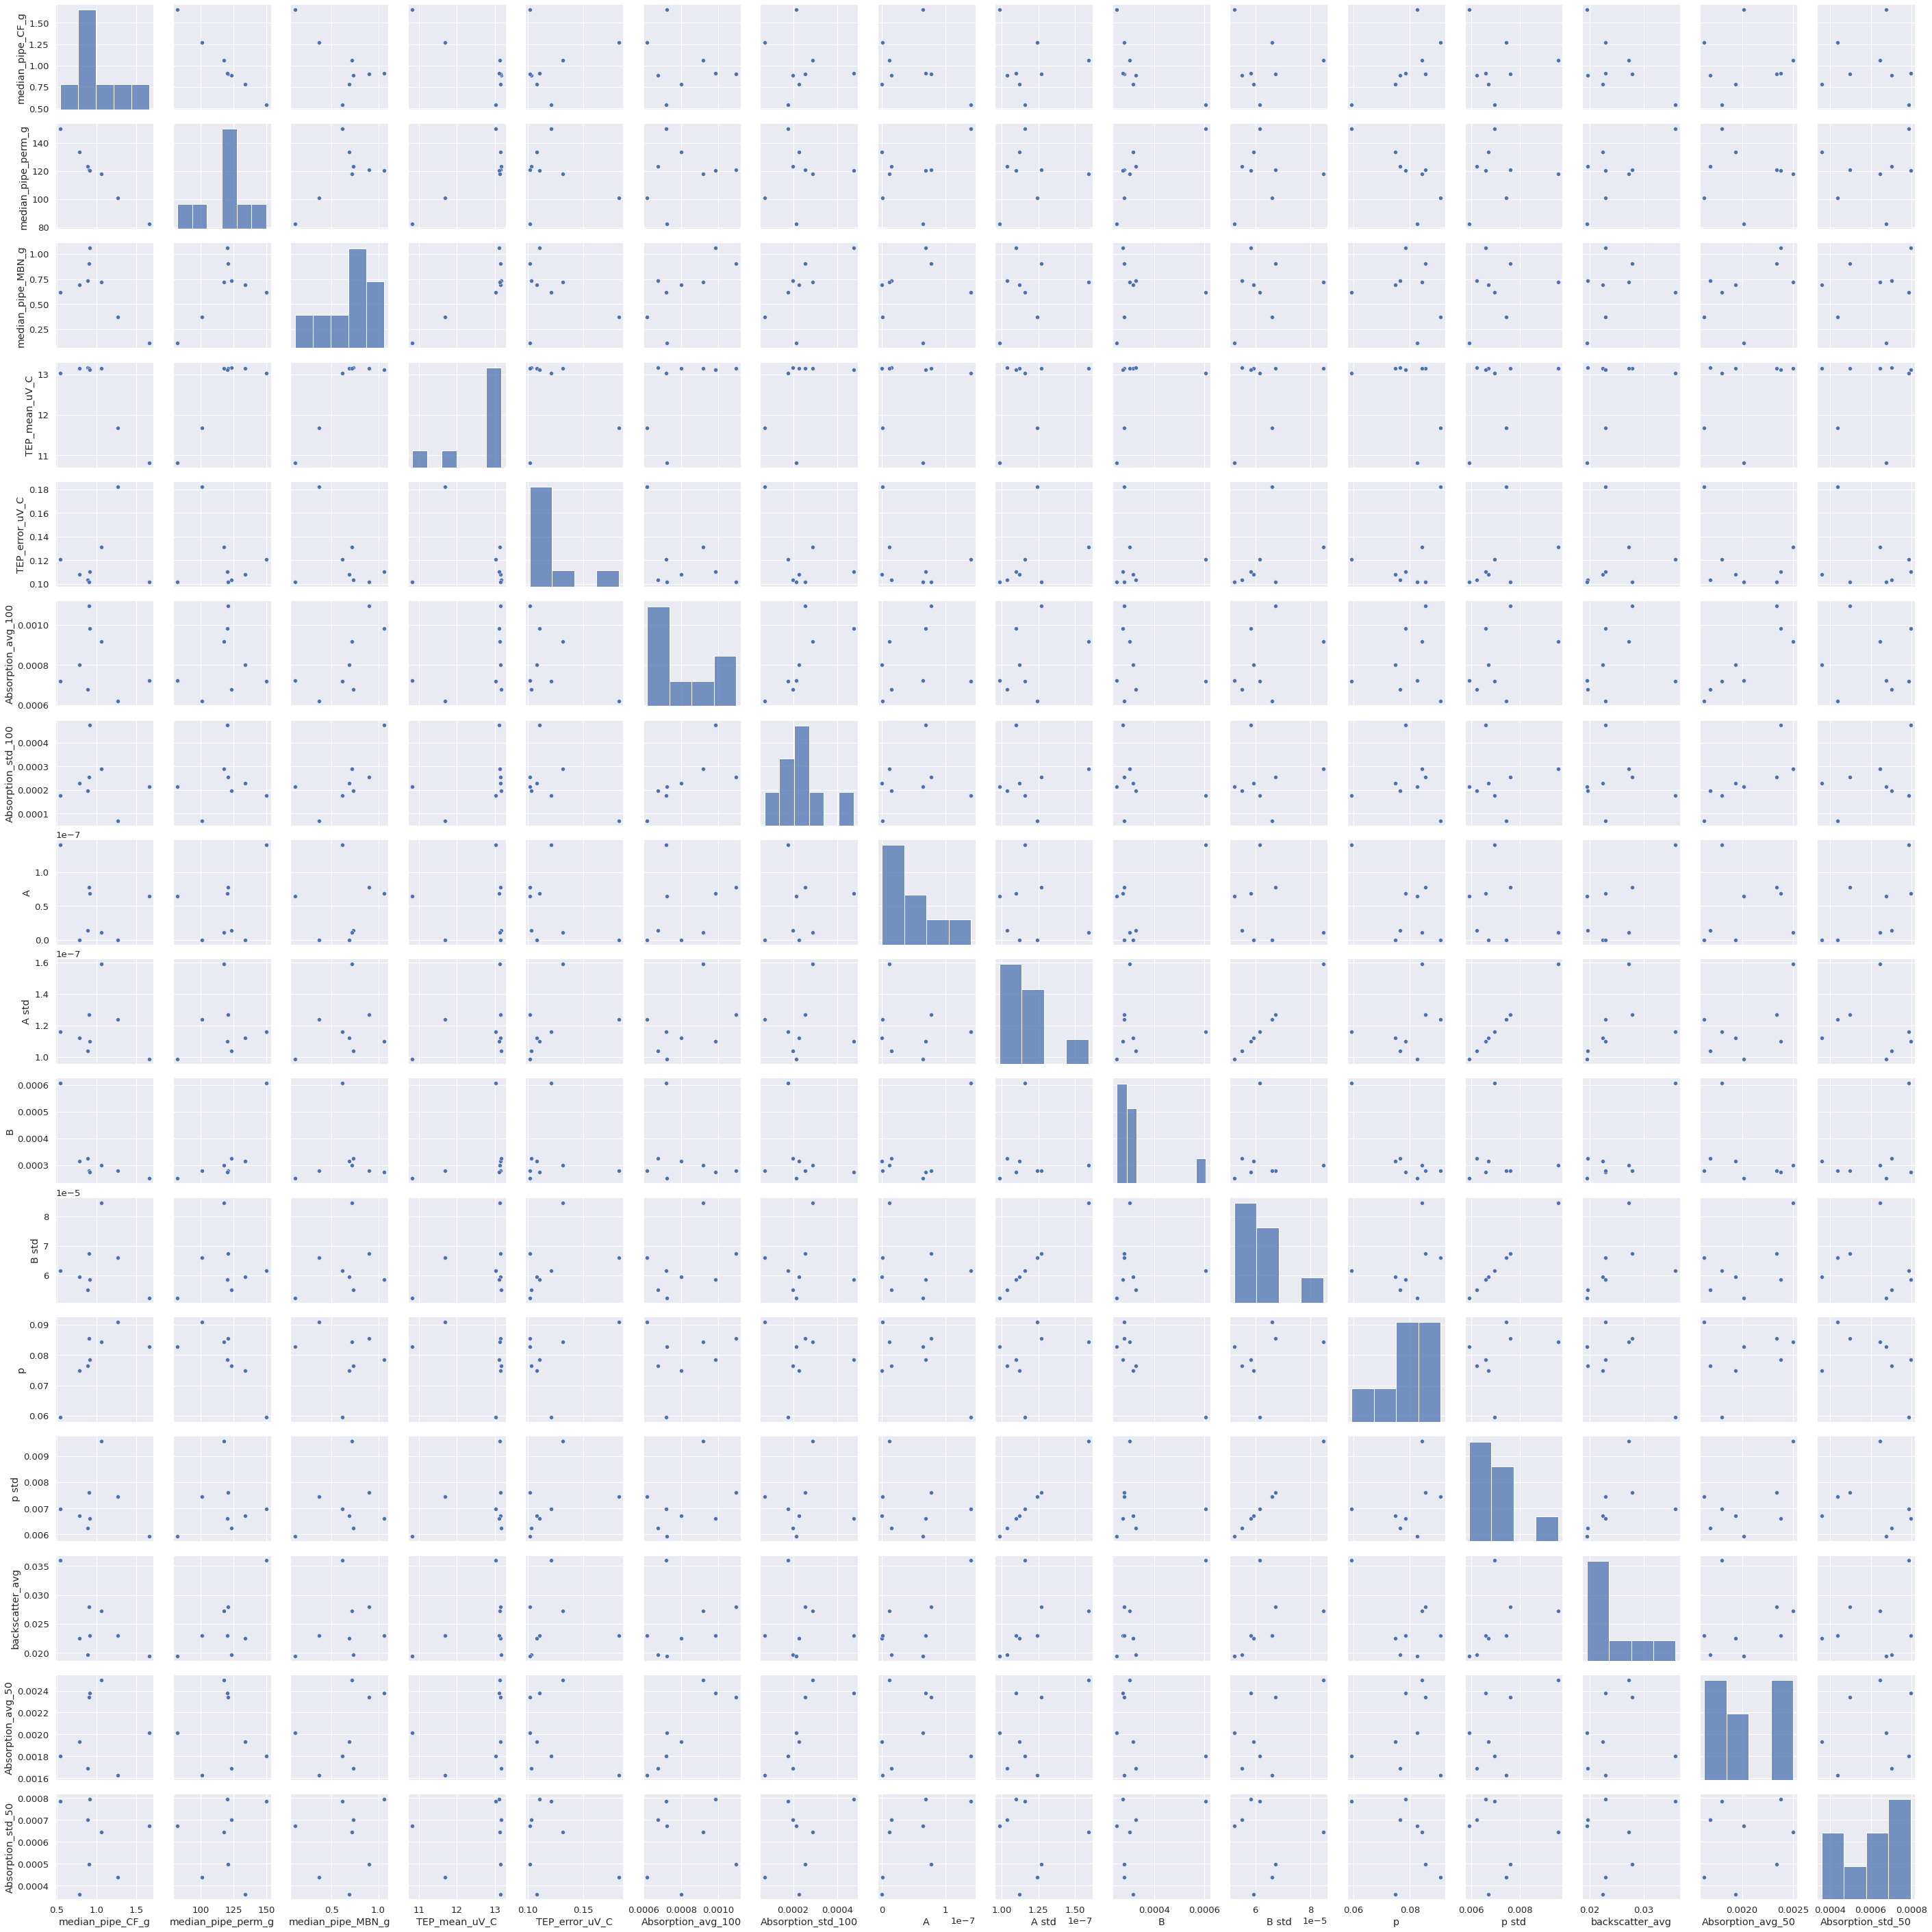

In [41]:
sns.pairplot(pipe)

In [49]:
from sklearn.preprocessing import StandardScaler

In [47]:
test = pipe.transpose()

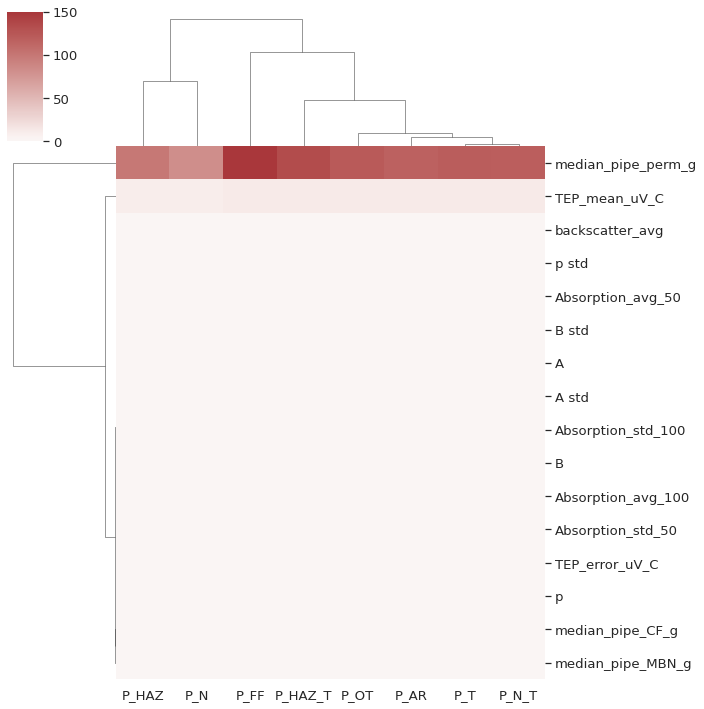

In [48]:
sns.clustermap(test, center=0, cmap="vlag",)